In [1]:
key ="2201050767bb417f928e06c7166304c6b41e485d"
b_key ="641DEDB0-361B-441D-BF2E-215378D97EB4"
from census import Census
from us import states
%matplotlib inline
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
pd.options.mode.chained_assignment = None 
import os
import requests
import urllib.request, json 
import pybea
from scipy.stats import norm
from matplotlib.ticker import PercentFormatter
matplotlib.style.use('ggplot')

def get_perc(times,total,df):
    portions = []
    for i in times:
        portions.append(100 * df[i].sum()/df[total].sum())
    return portions


c = Census(key)

In [2]:
county_types = pd.read_csv("2015CountyTypologyCodes.csv")
county_types["FIPStxt"] = county_types.FIPStxt.astype(str)
county_types["FIPStxt"] = county_types["FIPStxt"].str.zfill(5)

In [3]:
poor = county_types[county_types["Persistent_Poverty_2013"]== 1 ]
non_poor = county_types[county_types["Persistent_Poverty_2013"]== 0 ]

In [4]:
len(poor)

353

In [5]:
len(county_types)
def pred(df,v):
    qualities = df[df[v]== 1 ]
    return qualities



In [6]:
poor.columns

Index(['FIPStxt', 'State', 'County_name',
       'Metro-nonmetro status, 2013 0=Nonmetro 1=Metro',
       'Economic Types Type_2015_Update non-overlapping',
       'Economic_Type_Label', 'Farming_2015_Update', 'Mining_2015-Update',
       'Manufacturing_2015_Update', 'Government_2015_Update',
       'Recreation_2015_Update', 'Nonspecialized_2015_Update',
       'Low_Education_2015_Update', 'Low_Employment_Cnty_2008_2012_25_64',
       'Pop_Loss_2010', 'Retirement_Dest_2015_Update',
       'Persistent_Poverty_2013', 'Persistent_Related_Child_Poverty_2013'],
      dtype='object')

In [7]:
values = [ 'Farming_2015_Update', 'Mining_2015-Update',
       'Manufacturing_2015_Update', 'Government_2015_Update',
        'Nonspecialized_2015_Update',
       'Low_Education_2015_Update', 'Low_Employment_Cnty_2008_2012_25_64',
          'Metro-nonmetro status, 2013 0=Nonmetro 1=Metro']

result_t = []
result_p = []
result_np = []
for i in values:
    poor_c = pred(poor,i)
    np_c = pred(non_poor,i)
    total_c = pred(county_types,i)
    result_p.append(100* len(poor_c)/len(poor))
    result_t.append(100 * len(total_c)/len(county_types))
    result_np.append(100 * len(np_c)/len(county_types))


In [8]:
result_np

[14.444797963728922,
 7.158765510658607,
 14.953865733375755,
 11.835825644288896,
 34.33025771555838,
 8.654152083996182,
 19.662742602608972,
 35.475660197263764]

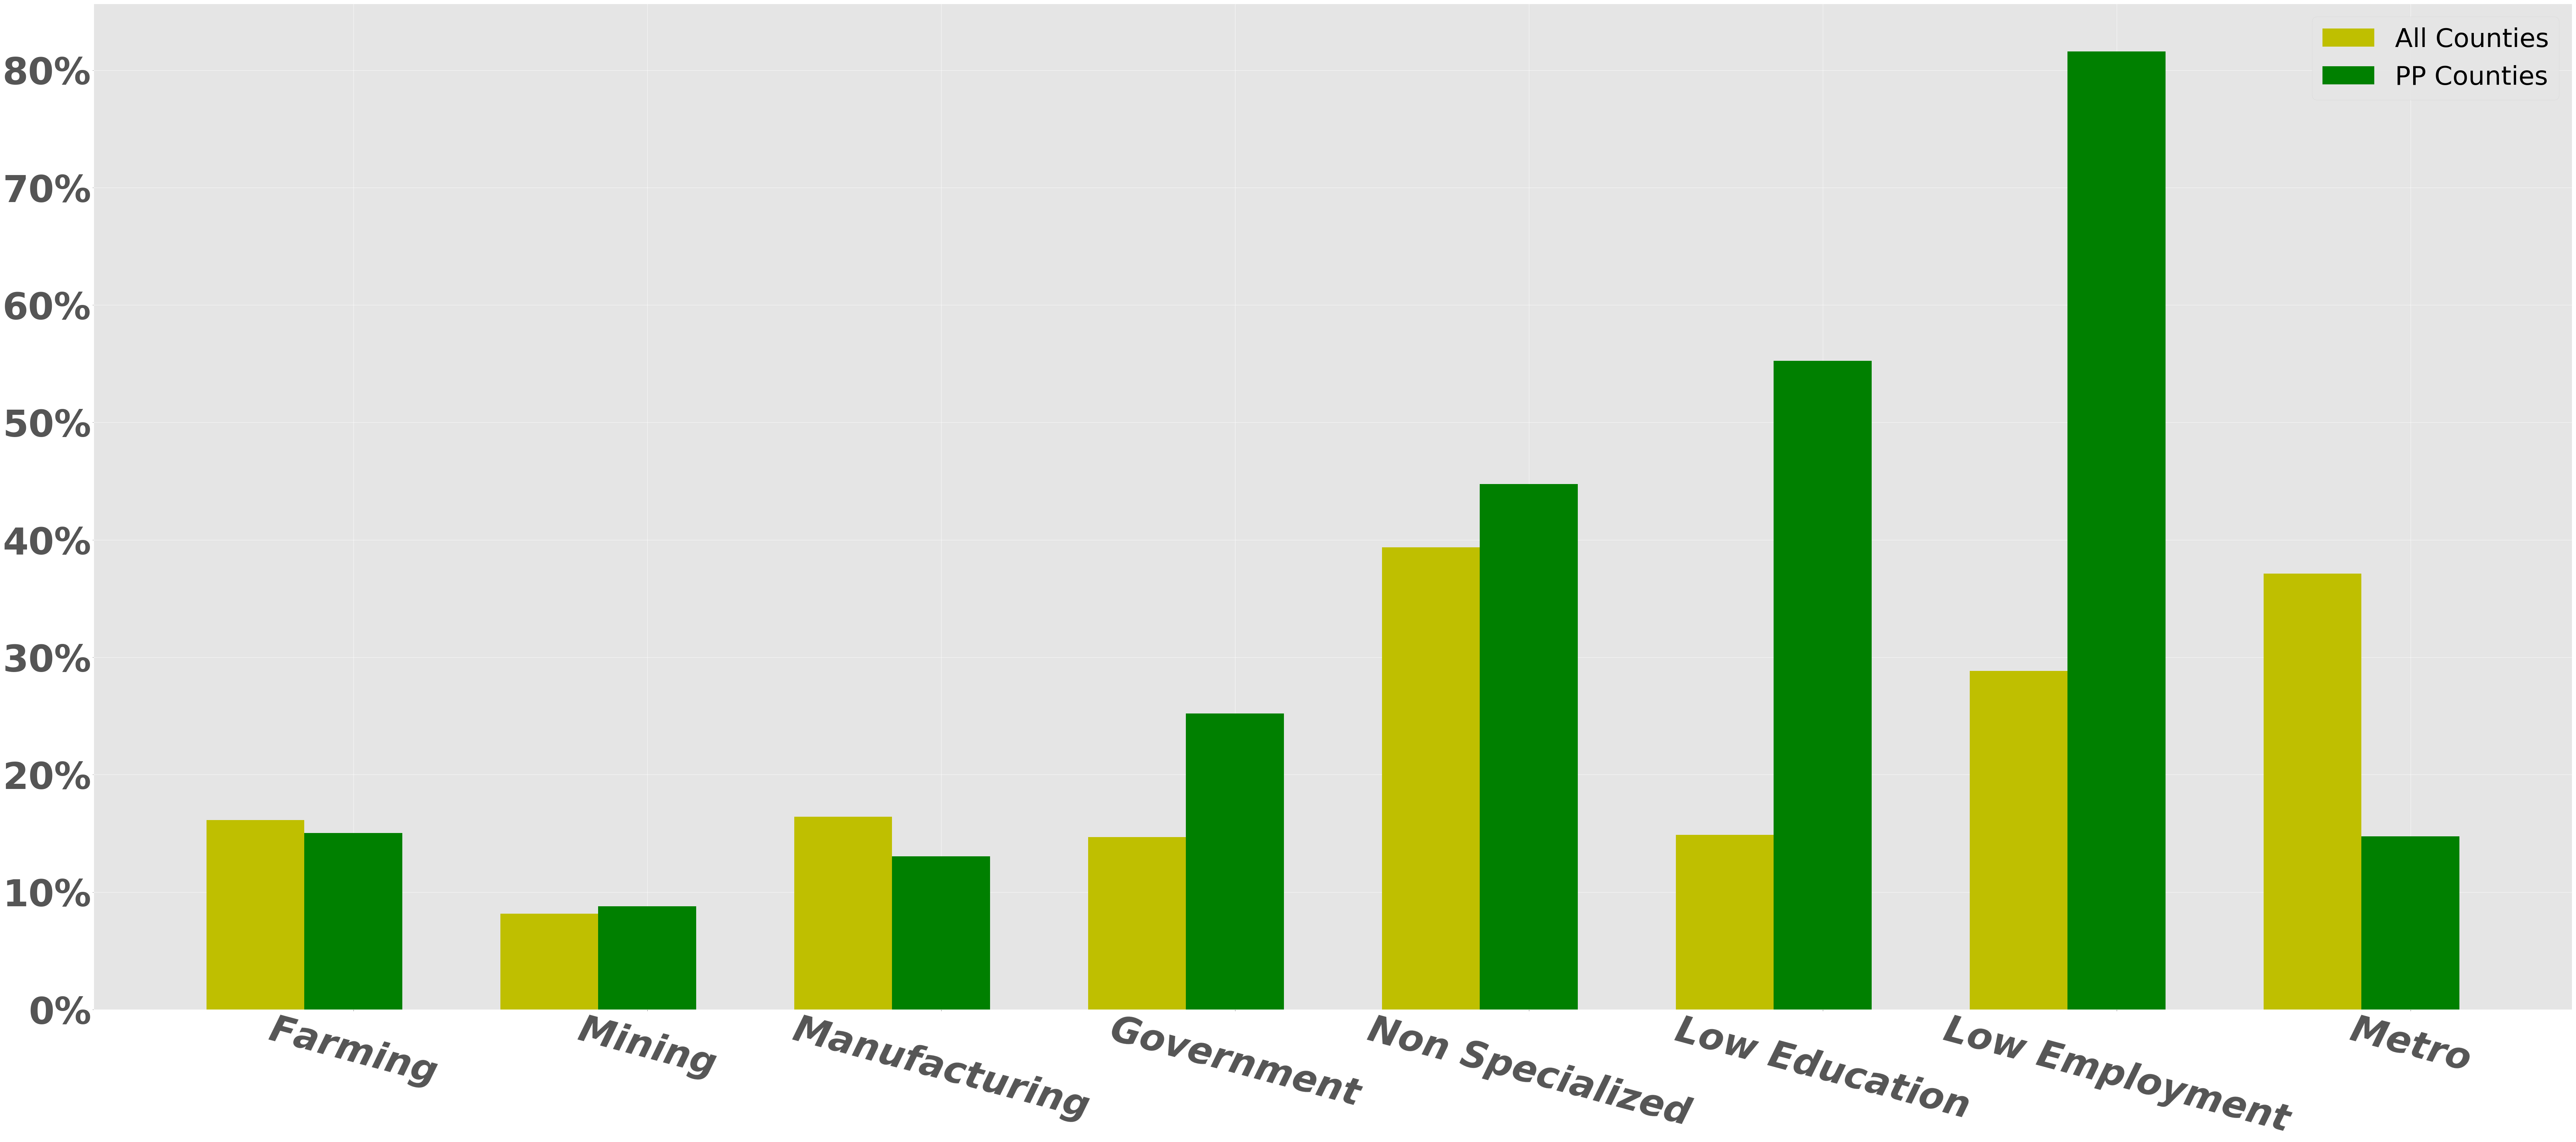

In [9]:
ticks = ["Farming","Mining","Manufacturing",
        "Government","Non Specialized","Low Education","Low Employment","Metro"]

indices = [i for i in range(len(result_p))]
#Calculate optimal width
width = np.min(np.diff(indices))/3


fig, ax = plt.subplots(figsize=(120, 50) ,sharex = True )


ax.bar(indices-width,result_t,width,color='y',label='All Counties')
ax.bar(indices,result_p,width,color='g',label='PP Counties')

ax.yaxis.set_major_formatter(PercentFormatter())

plt.yticks(fontsize = 100,fontweight="bold")
ax.legend(loc=1, prop={'size': 70})

plt.xticks( [i for i in range(len(result_p))],ticks,fontsize=100,rotation=345,fontstyle="italic",fontweight="bold")
plt.show()

In [35]:
all_c = pd.read_csv("../final_county.csv")

In [36]:
all_c.columns

Index(['Unnamed: 0', 'B01001_003E', 'B01001_004E', 'B01001_005E',
       'B01001_006E', 'B01001_027E', 'B01001_028E', 'B01001_029E',
       'B01001_030E', 'Median Age', 'Median Age ME', 'Population', 'White',
       'Black', 'Native American', 'Asian', 'Native Hawaiian', 'Other',
       'Multiple', 'Hispanic', 'Foreign Born', 'Foreign Born ME',
       'Child Poverty Ratio', 'total_ed', 'below_hs', 'hs_grad',
       'some_college', 'bachelor_deg', 'graduate_deg', 'Poor',
       'agg_travel_time', 'work_time', 'under5', 'five', 'ten', 'fifteen',
       'twenty', 'twenty5', 'thirty', 'thirty5', 'fourty', 'fourty5', 'sixty',
       'ninety', 'h_above_poverty', 'Median Household Income', 'acs_laborf',
       'acs_unemployed', 'Name', 'County', 'State', 'under_18'],
      dtype='object')

In [37]:
all_c["County"] = all_c["County"].astype(str)
all_c["County"] = all_c["County"].str.zfill(3)
all_c['State'] = all_c['State'].astype(str)
all_c['State'] = all_c['State'].str.zfill(2)

In [38]:
all_c["geo_id"] = all_c["State"]+all_c["County"]
county_types = county_types.rename(index=str, columns={"FIPStxt": "geo_id"})
county_types.head()

,geo_id,State,County_name,"Metro-nonmetro status, 2013 0=Nonmetro 1=Metro",Economic Types Type_2015_Update non-overlapping,Economic_Type_Label,Farming_2015_Update,Mining_2015-Update,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,Low_Education_2015_Update,Low_Employment_Cnty_2008_2012_25_64,Pop_Loss_2010,Retirement_Dest_2015_Update,Persistent_Poverty_2013,Persistent_Related_Child_Poverty_2013
0,01001,AL,Autauga County,1,0,Nonspecialized,0,0,0,0,0,1,0,0,0,1,0,0
1,01003,AL,Baldwin County,1,5,Recreation,0,0,0,0,1,0,0,0,0,1,0,0
2,01005,AL,Barbour County,0,3,Maufacturing,0,0,1,0,0,0,1,1,0,0,1,1
3,01007,AL,Bibb County,1,0,Nonspecialized,0,0,0,0,0,1,1,1,0,0,0,1
4,01009,AL,Blount County,1,0,Nonspecialized,0,0,0,0,0,1,1,1,0,0,0,0


In [39]:
county_types["geo_id"]

0       01001
1       01003
2       01005
3       01007
4       01009
5       01011
6       01013
7       01015
8       01017
9       01019
10      01021
11      01023
12      01025
13      01027
14      01029
15      01031
16      01033
17      01035
18      01037
19      01039
20      01041
21      01043
22      01045
23      01047
24      01049
25      01051
26      01053
27      01055
28      01057
29      01059
        ...  
3113    55129
3114    55131
3115    55133
3116    55135
3117    55137
3118    55139
3119    55141
3120    56001
3121    56003
3122    56005
3123    56007
3124    56009
3125    56011
3126    56013
3127    56015
3128    56017
3129    56019
3130    56021
3131    56023
3132    56025
3133    56027
3134    56029
3135    56031
3136    56033
3137    56035
3138    56037
3139    56039
3140    56041
3141    56043
3142    56045
Name: geo_id, Length: 3143, dtype: object

In [61]:
df = pd.merge(all_c,county_types, on ="geo_id")

In [62]:
df.columns

Index(['Unnamed: 0', 'B01001_003E', 'B01001_004E', 'B01001_005E',
       'B01001_006E', 'B01001_027E', 'B01001_028E', 'B01001_029E',
       'B01001_030E', 'Median Age', 'Median Age ME', 'Population', 'White',
       'Black', 'Native American', 'Asian', 'Native Hawaiian', 'Other',
       'Multiple', 'Hispanic', 'Foreign Born', 'Foreign Born ME',
       'Child Poverty Ratio', 'total_ed', 'below_hs', 'hs_grad',
       'some_college', 'bachelor_deg', 'graduate_deg', 'Poor',
       'agg_travel_time', 'work_time', 'under5', 'five', 'ten', 'fifteen',
       'twenty', 'twenty5', 'thirty', 'thirty5', 'fourty', 'fourty5', 'sixty',
       'ninety', 'h_above_poverty', 'Median Household Income', 'acs_laborf',
       'acs_unemployed', 'Name', 'County', 'State_x', 'under_18', 'geo_id',
       'State_y', 'County_name',
       'Metro-nonmetro status, 2013 0=Nonmetro 1=Metro',
       'Economic Types Type_2015_Update non-overlapping',
       'Economic_Type_Label', 'Farming_2015_Update', 'Mining_2015-Upda

In [63]:
poor_df = df[df["Persistent_Poverty_2013"]== 1 ]

In [64]:

(df['Asian'] == 0.0).all()
#df['Asian'][0]
na = df[df['Asian'] == None]
na


,Unnamed: 0,B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,Median Age,...,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,Low_Education_2015_Update,Low_Employment_Cnty_2008_2012_25_64,Pop_Loss_2010,Retirement_Dest_2015_Update,Persistent_Poverty_2013,Persistent_Related_Child_Poverty_2013


c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


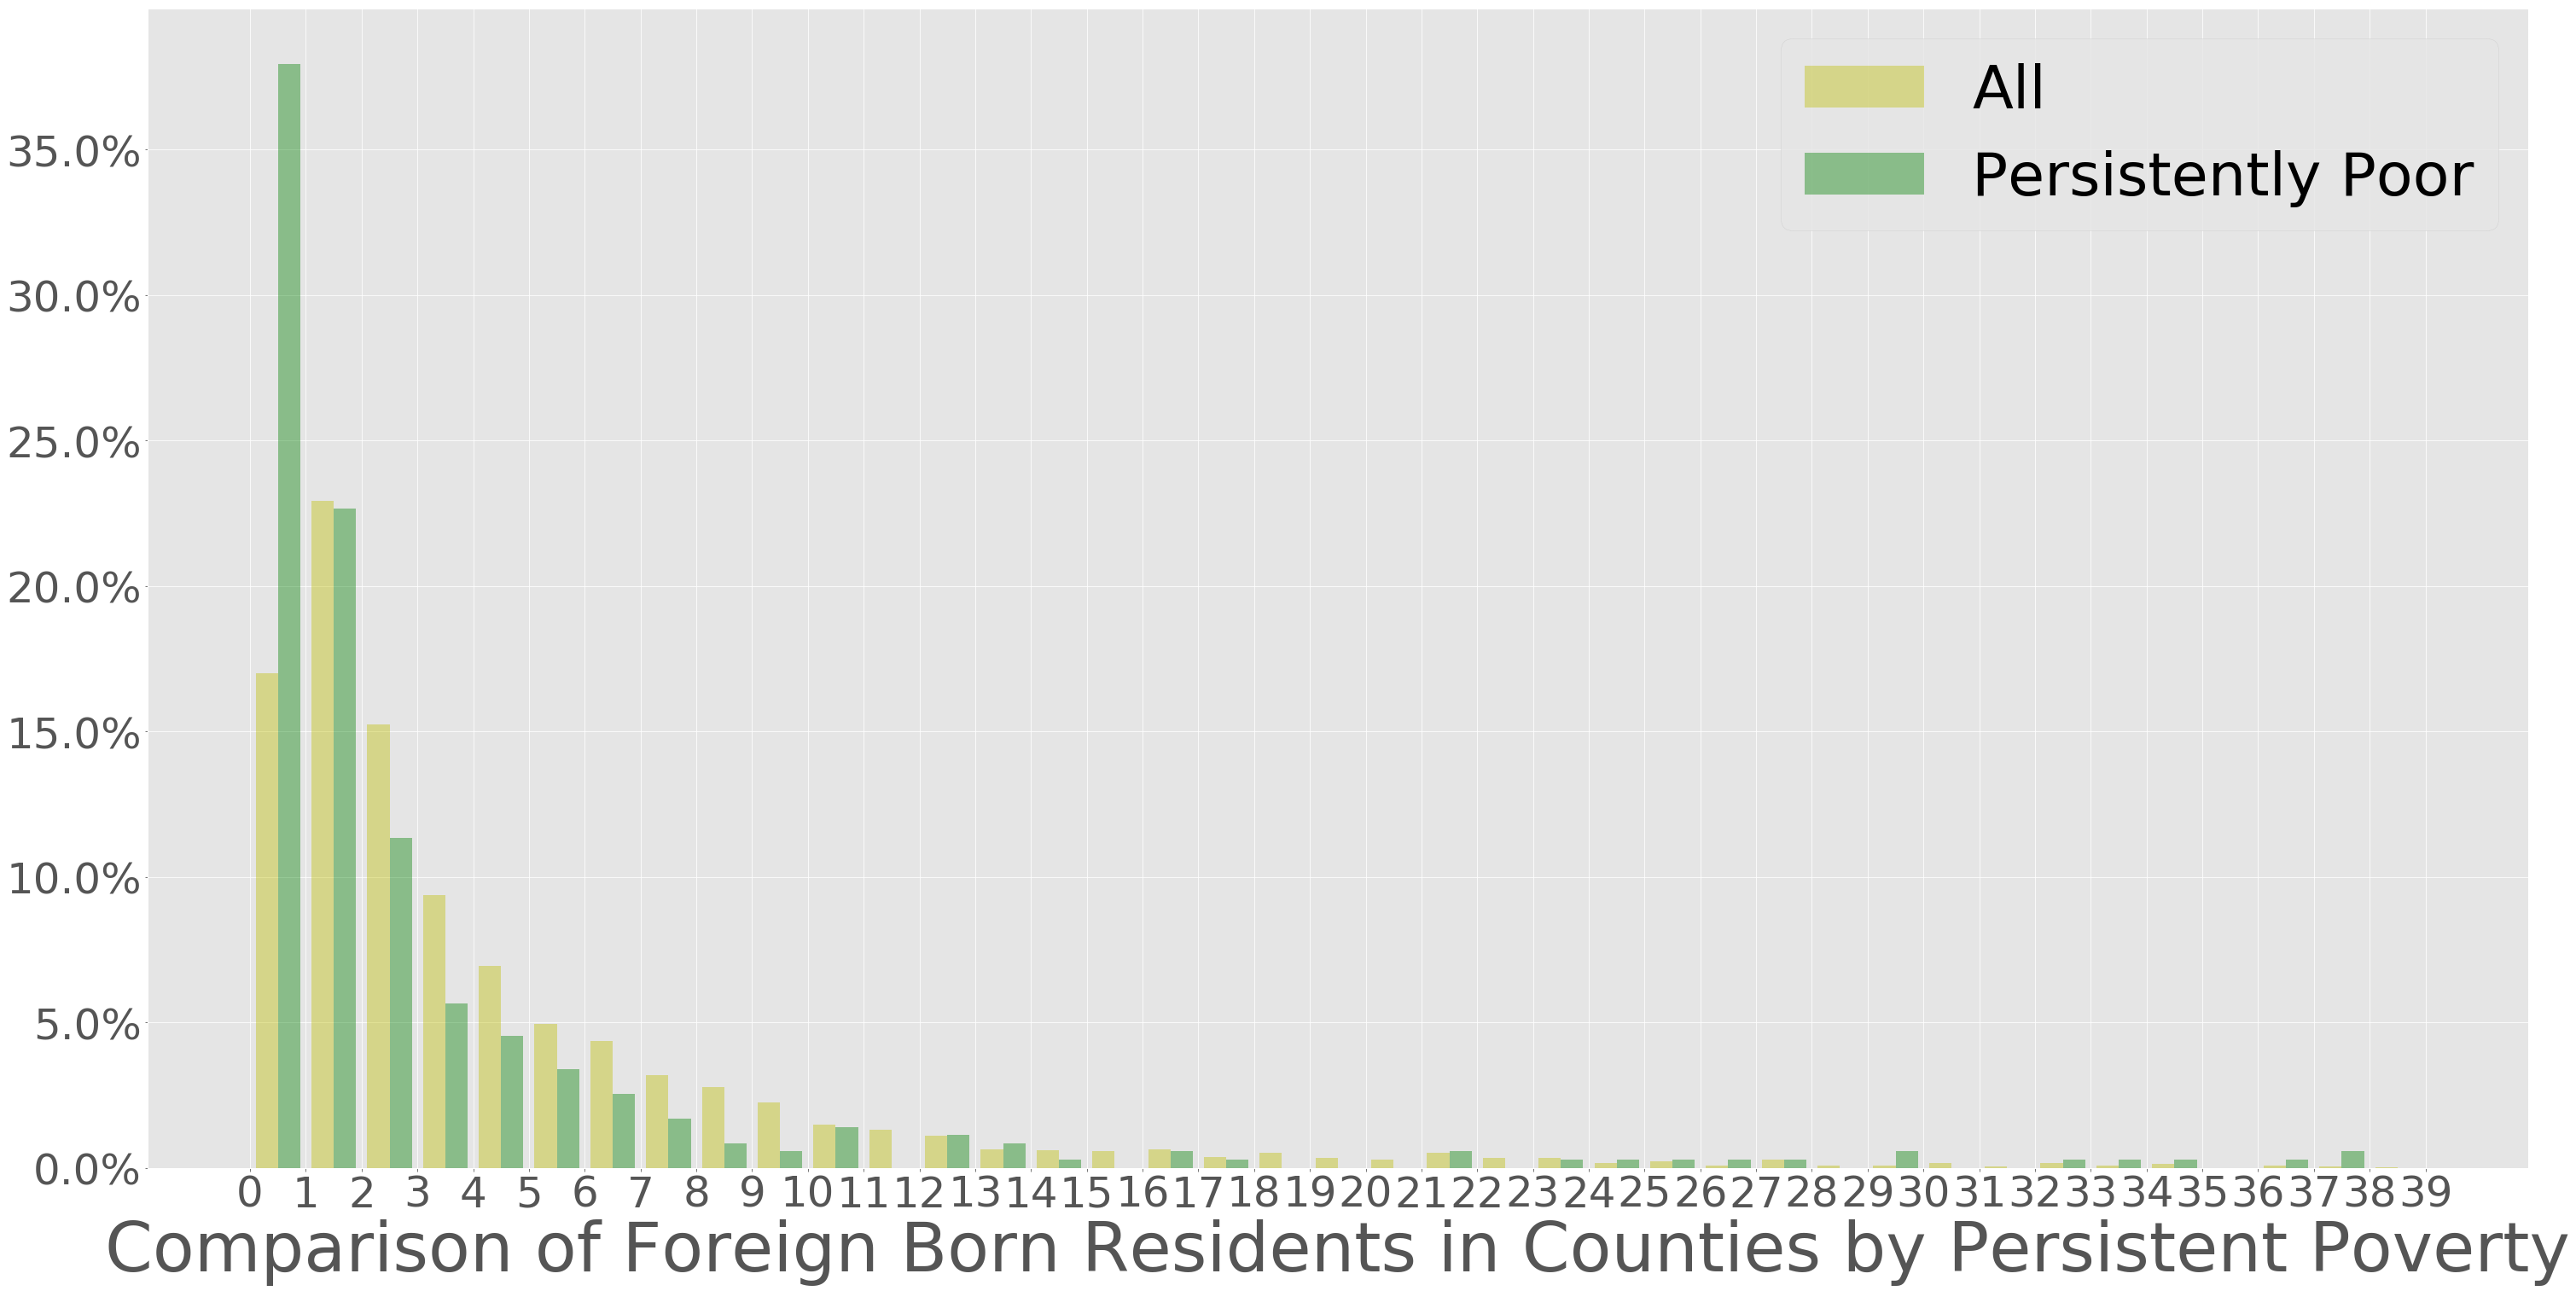

In [130]:
x = 'Foreign Born'
r_as = 100 *df[x]/df["Population"].astype(int)
m_as = 100 * poor_df[x]/poor_df["Population"].astype(int)
sns.color_palette(palette="dark")

fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i for i in range(0,40)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['y',"g",] , label=['All','Persistently Poor'], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})

plt.xlabel('Comparison of '+x+' Residents in Counties by Persistent Poverty', fontsize=80)
plt.show()

In [80]:
(100 * df["Asian"]/ df["Population"]).sort_values().median()

0.5619508769156585

c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


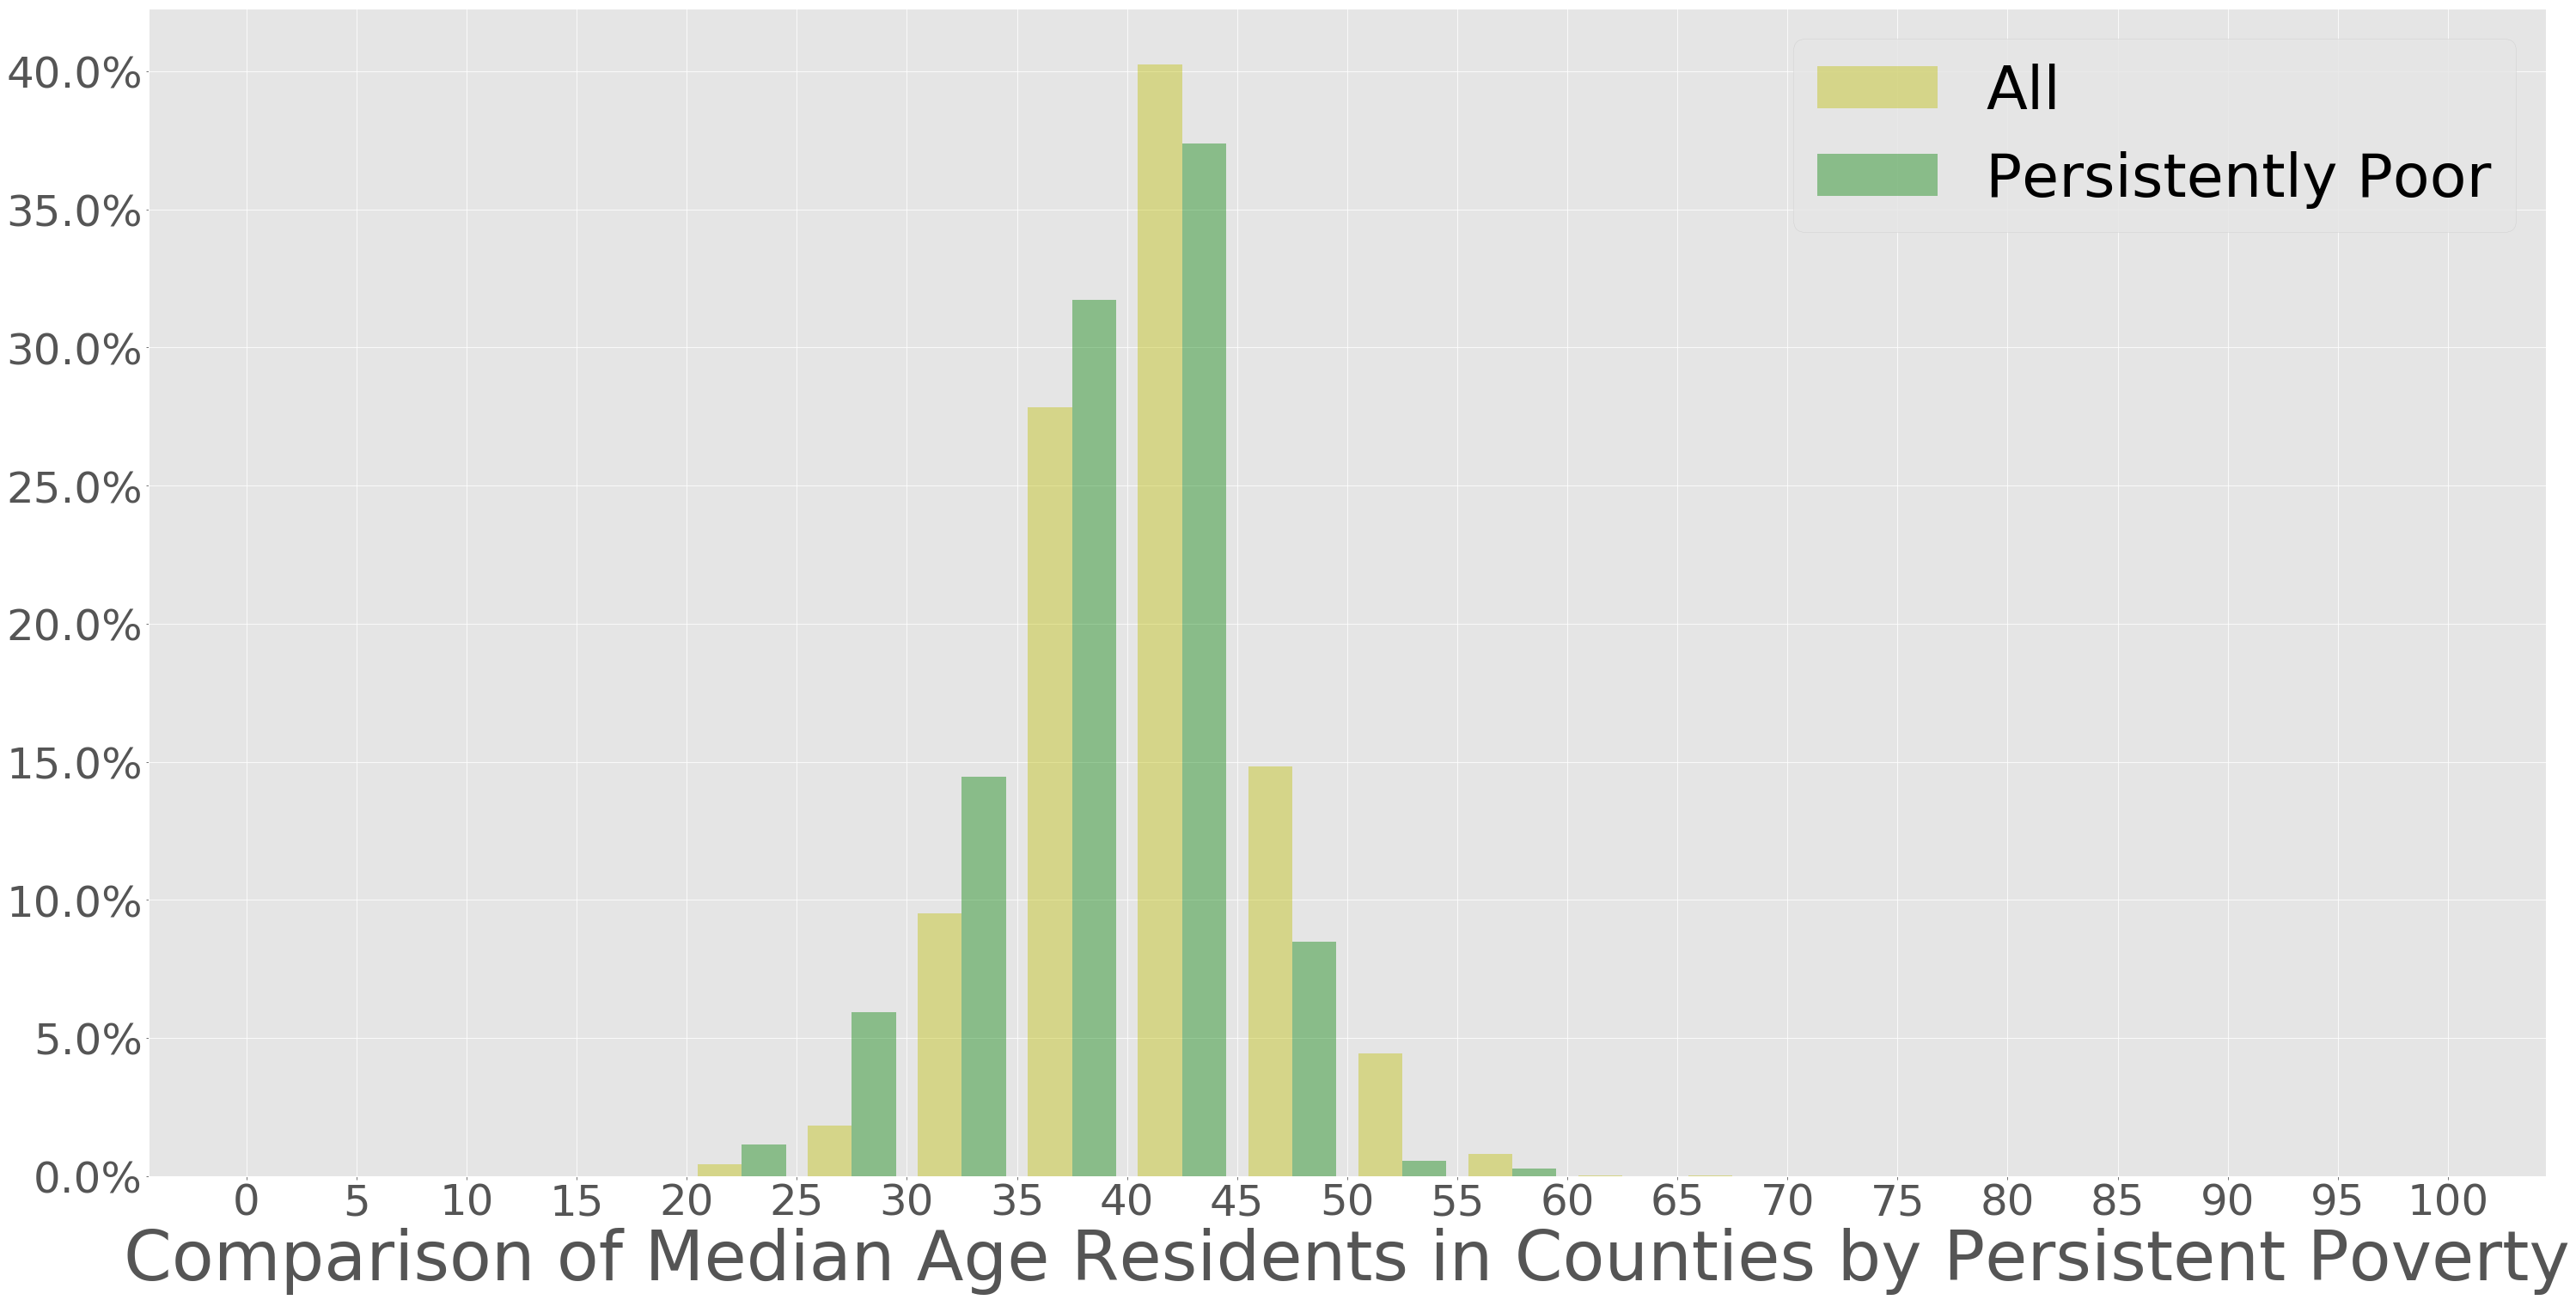

In [90]:
x = 'Median Age'
r_as = df[x]
m_as = poor_df[x]


fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i *5 for i in range(0,21)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['y',"g",] , label=['All','Persistently Poor'], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})

plt.xlabel('Comparison of '+x+' Residents in Counties by Persistent Poverty', fontsize=80)
plt.show()

In [92]:
poor_df['Median Age'].min()

23.300000000000001

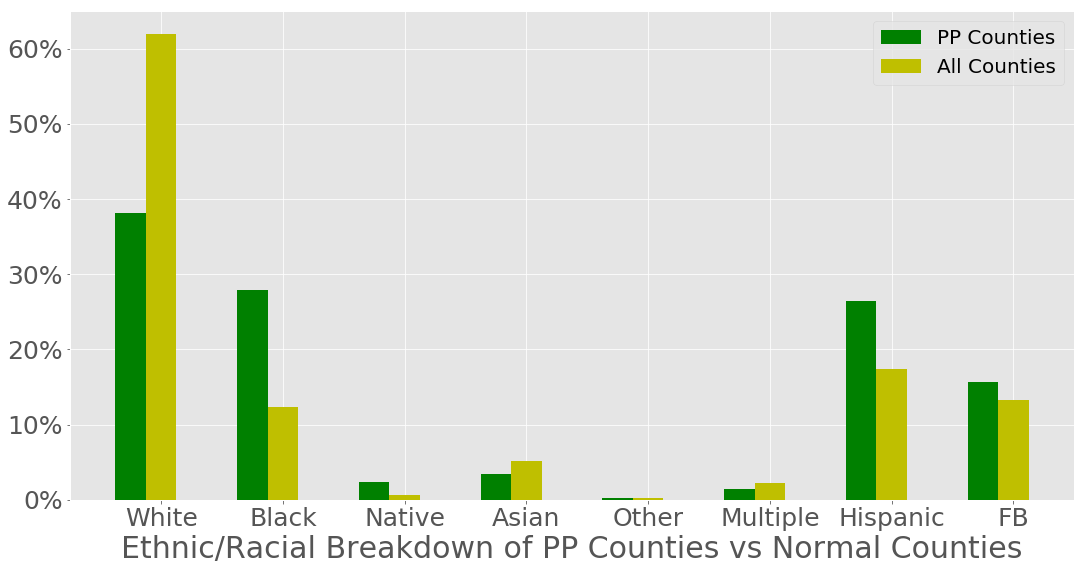

In [129]:
def get_perc(times,total,df):
    portions = []
    for i in times:
        portions.append(100 * df[i].sum()/df[total].sum())
    return portions

ind = np.arange(12)
race = ['White','Black', 'Native American', 'Asian','Other', 'Multiple', 'Hispanic', 'Foreign Born' ]

poor = get_perc(race,"Population",poor_df) 
normal = get_perc(race,"Population",df) 

data = [poor,normal]

times = ['White','Black', 'Native', 'Asian', 'Other', 'Multiple', 'Hispanic', 'FB' ]
f, ax = plt.subplots(figsize=(18,9))

X = np.arange(len(times))
plt.bar(X + 0.00, data[0], color = 'g', width = 0.25,label="PP Counties")
plt.bar(X + 0.25, data[1], color = 'y', width = 0.25, tick_label = times,align = "center",label="All Counties")

plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Ethnic/Racial Breakdown of PP Counties vs Normal Counties', fontsize=30)
ax.legend(loc=1, prop={'size': 20})


plt.show()

In [139]:
poor_df.sort_values(['Foreign Born']).tail()['geo_id']


3119    42101
3075    48141
3072    48215
3116    36005
3134    36047
Name: geo_id, dtype: object

In [124]:
x = 'Foreign Born'
r_as = 100 *poor_df[x]/poor_df["Population"].astype(int)
r_as.median()

1.460591290963894

In [137]:
poor_df['Foreign Born'].sum()


2726287.0